In [43]:
import pandas
import json
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.preprocessing import LabelEncoder

{'layers': [{'type': 'input', 'neurons': 4}, {'type': 'hidden', 'neurons': 4, 'activation': 'sigmoid'}, {'type': 'output', 'neurons': 1, 'activation': 'sigmoid'}], 'learning_rate': 0.1, 'epochs': 2, 'batch_size': 32}
Epoch 1/2
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7614 - loss: 0.5578 - val_accuracy: 0.7539 - val_loss: 0.5545
Epoch 2/2
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7648 - loss: 0.5450 - val_accuracy: 0.7539 - val_loss: 0.5579
{'accuracy': [0.7627773880958557, 0.7626749873161316], 'loss': [0.5503480434417725, 0.5497912764549255], 'val_accuracy': [0.7539154291152954, 0.7539154291152954], 'val_loss': [0.5544814467430115, 0.5578597187995911]}


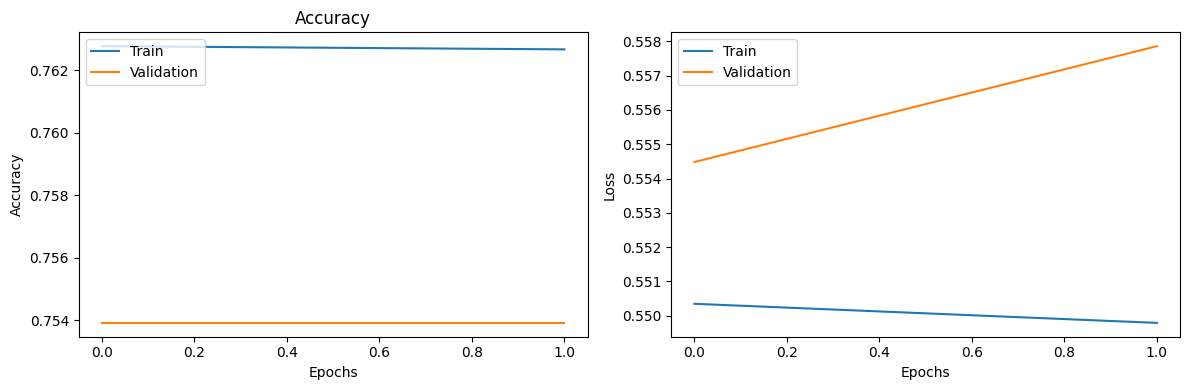

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                     │ (None, 4)                   │             436 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,325 (5.18 KB)

 Trainable params: 441 (1.72 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 884 (3.46 KB)

In [76]:
data = pandas.read_csv('dataset/adult.csv.')
data.dropna()
data.drop_duplicates()
data.drop('fnlwgt', axis = 1)

X = pandas.get_dummies(data.drop('income', axis = 1))
y = data['income']


le = LabelEncoder()
y = le.fit_transform(y)

with open('MLP.json') as f:
    data = json.load(f)
print(data)
layers_list = []
for layer in data['layers']:
    if layer['type'] == 'input':
        layers_list.append(Input((X.shape[1],)))
    else:
        layers_list.append(Dense(layer['neurons'], activation = layer['activation']))
    

model = Sequential(layers_list)

model.compile(optimizer = 'adam', loss = "binary_crossentropy", metrics = ['accuracy'])

x_tensor = tf.convert_to_tensor(X, dtype = tf.float32)
y_tensor = tf.convert_to_tensor(y, dtype = tf.float32)

history = model.fit(x_tensor, y_tensor, epochs = data['epochs'], batch_size = data['batch_size'], validation_split = 0.2)
print(history.history)
plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
plt.title('Accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'] , loc = 'upper left')


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc = 'upper left')

plt.tight_layout()
plt.show()

model.summary()

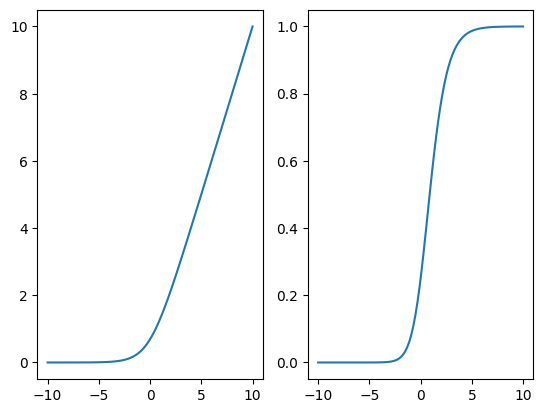

In [74]:
x_values = np.linspace(-10, 10, 100)

def linear(x):
    return x
def linear_derivative(x):
    return np.ones_like(x)

def binary_step(x):
    return np.where(x >= 0, 1, 0)

def binary_step_derivative(x):
    return np.zeros_like(x)


def sigmoid(x):
    return 1 / ( 1 + np.exp(-x));
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def tanh(x):
    return ((np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x)))

def tanh_derivative(x):
    return 1 - (tanh(x))**2

def relu(x):
    return np.where(x>=0, x, 0)
def relu_derivative(x):
    return np.where(x>=0, 1, 0)

def leaky_relu(x, alpha = 1.0):
    return np.where(x>=0, x, alpha*x)
def leaky_relu_derivative(x, alpha = 1.0):
    return np.where(x>=0, 1, alpha)


def elu(x, alpha = 1.0):
    return np.where(x >= 0, x,  alpha * (np.exp(x) - 1)) 
def elu_derivate(x, alpha = 1.0):
    return np.where(x>= 0, 1,alpha * (np.exp(x)))

def softsign(x):
    return x / ( 1 + abs(x) )

def softsign_derivative(x):
    return 1 / ( 1 + abs(x) ) ** 2

def softplus(x):
    return np.log(1 + np.exp(x))
def softplus_derivative(x):
    return 1 / (1 + np.exp(-x))**2

plt.figure()
plt.subplot(1, 2, 1)
y_values = softplus(x_values)
plt.plot(x_values, y_values)

plt.subplot(1, 2, 2)
y_deriv = softplus_derivative(x_values)
plt.plot(x_values, y_deriv)

